<a href="https://colab.research.google.com/github/NITIN9694/TensorFlow-Learning/blob/main/0_8_Food_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MileStone  Project 1 : Food Vision

##What we're going to cover


* Using TensorFlow Datasets to download and explore data
* Batching & preparing datasets for modelling (making our datasets run fast)
* Creating modelling callbacks
* Setting up mixed precision training
* Building a feature extraction model (see transfer learning part 1: feature   extraction)
*  Fine-tuning the feature extraction model (see transfer learning part 2: fine-tuning)
*  Viewing training results on TensorBoard









##Check GPU
Google collab offer free GPU

Google collab offers:
* K80 (not compatible)
* P100 (not compatible)
* Tesla T4 (not compatible)

Knowing this, in order to use mixed precision training we need access to Tesla T4 or if we're using own hardware , Our Gpu need a score of 7.0+

In [8]:
# Get GPU name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-770e5450-5b20-96ef-ab5c-920bd24e5e14)


In [9]:
#Get helper funcation
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-06 17:02:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-10-06 17:02:34 (129 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [10]:
#Import series of helper funcation
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

#Use Tensorflow Dataset to Download Data
more info (https://www.tensorflow.org/datasets/dataset_collections)

In [11]:
#Get the dataset
import tensorflow_datasets as tfds

In [12]:
#Get list of dataset
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [13]:
#Load data set its 4GB Data
(train_data,test_data), ds_info = tfds.load(
    name = "food101",
    split = ["train","validation"],
    shuffle_files = True,
    as_supervised = True, #data gets returned in tuple formate(data, label)
    with_info = True

)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.HJVT4Q_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.HJVT4Q_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


##Exploring The Food101 data from tensorflow dataset

To become one with our data, we want to find:

*   Class Name
*   The shape of our input data (image tensor)
*   The datatype of our input data
*   What the label look like (e.g are they one-hot encoded or are they label encoded)

*   Do the labels match with the class name





In [14]:
#Feature of Food101 From TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [15]:
class_name = ds_info.features["label"].names
class_name[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [16]:
# Take one sample off the training data
train_sample = train_data.take(1)

In [17]:
# What does one sample of our training data look like?
train_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [18]:
# Output info about our training sample
for image, label in train_sample:
 print(f"""
Image shape {image.shape}
Image dtype. {image.dtype}
Target class from Food101 (tensor form): {label}
Class name (str form): {class_name[label.numpy()]}

"""
)


Image shape (512, 512, 3)
Image dtype. <dtype: 'uint8'>
Target class from Food101 (tensor form): 56
Class name (str form): huevos_rancheros




In [19]:
# What does an image tensor from TFDS's Food101 look like?

image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

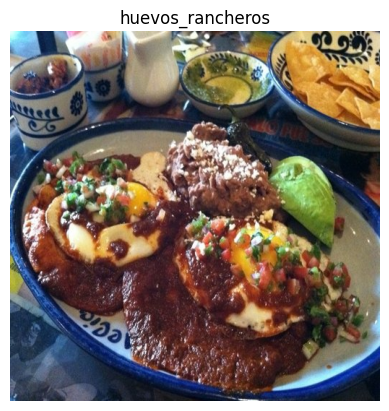

In [20]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_name[label.numpy()])
plt.axis(False)

##Create preprocing funcation for our data

Neural Network perfom better when the data is certain way(e.g batched, normilized)
However not all data (including data from tensorflow dataset) come like this.

However, since we've downloaded the data from TensorFlow Datasets, there are a couple of preprocessing steps we have to take before it's ready to model.

More specifically, our data is currently:
*  In uint8 data type
*  Comprised of all differnet sized tensors (different sized images)
*  Not scaled (the pixel values are between 0 & 255)


Whereas, models like data to be:


*  In float32 data type
*  Have all of the same size tensors (batches require all tensors have the same shape, e.g. (224, 224, 3))
* Scaled (values between 0 & 1), also called normalized


Since we are using EfficientNetBX pretrained model tf.keras.application we dont need to resacale our data (these architure have rescaling bult in )

This mean aur funcation need
1. Reshape our image to all the same image
2. Convert the dtype of our image tensor from unit8 to float 32




In [21]:
 #make funcation for preprcoing image
import tensorflow as tf

def preprcoing_image(image,label,image_shape=224):
  """
  Convert image data type from unit8 -> float32 and reshapes image
  to [img_shape,img_shape,color_channels]
  """
  image = tf.image.resize(image,[image_shape,image_shape]) #reshape the trage image
  image = image/255. #scaling
  return tf.cast(image,tf.float32), label #return (float32_image,label ) tuple

In [22]:
#preprocess single sample image and check the output
preprocessed_image = preprcoing_image(image,label)
print(f"Image before preprocessing :\n {image[:2]}...,\nShape: {image.shape},\n {image.dtype}")
print(f"Image after preprocessing :\n {preprocessed_image[0][:2]}...,\nShape: {preprocessed_image[0].shape},\n {preprocessed_image[0].dtype}")

Image before preprocessing :
 [[[233 253 251]
  [231 253 250]
  [228 254 251]
  ...
  [ 85  82  89]
  [ 68  67  75]
  [ 57  57  67]]

 [[232 254 252]
  [229 254 251]
  [226 255 251]
  ...
  [121 116 120]
  [100  99 104]
  [ 86  85  91]]]...,
Shape: (512, 512, 3),
 <dtype: 'uint8'>
Image after preprocessing :
 [[[0.9045418  0.99467784 0.9843137 ]
  [0.87450975 0.9998999  0.9889956 ]
  [0.81202483 1.         0.9818327 ]
  ...
  [0.5516191  0.5079419  0.47538933]
  [0.4750693  0.4520202  0.45864302]
  [0.32922992 0.32580858 0.35151908]]

 [[0.8685274  0.997559   0.9934574 ]
  [0.84121644 1.         0.9957783 ]
  [0.77809125 0.99837935 0.98811525]
  ...
  [0.81828696 0.76792717 0.6800323 ]
  [0.7726689  0.745518   0.68561417]
  [0.6883936  0.6730074  0.63221115]]]...,
Shape: (224, 224, 3),
 <dtype: 'float32'>


##Batch & prepare datasets
Before we can model our data, we have to turn it into batches.

Why?

Because computing on batches is memory efficient.

We turn our data from 101,000 image tensors and labels (train and test combined) into batches of 32 image and label pairs, thus enabling it to fit into the memory of our GPU.


We are going to make our data input pipline run really fast.


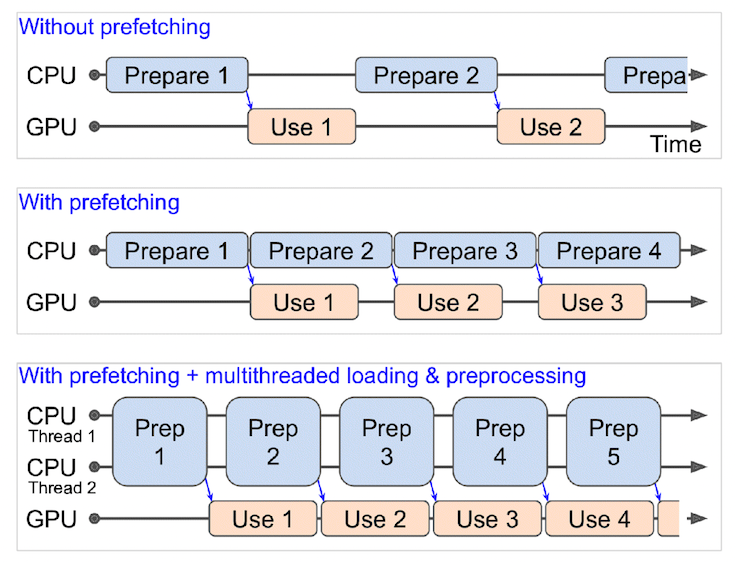

In [23]:
#Map preprocessing funcations to training
train_data = train_data.map(map_func = preprcoing_image, num_parallel_calls=tf.data.AUTOTUNE)
#Shuffle train data in turn into batches
train_data = train_data.shuffle(buffer_size=100).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)


# map preprocessing for test data
test_data  = test_data.map(preprcoing_image,num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

Tensorflow map this processing funcation (preprcoing_image) across our training dataset then suffle a number of elements and batch them together and finally make sure you prepare a batch (prefetch) whilst the model is looking through (finiding pattern) the current batch

##Creating Model callback

Since we're going to be training on a large amount of data and training could take a long time, it's a good idea to set up some modelling callbacks so we be sure of things like our model's training logs being tracked and our model being checkpointed (saved) after various training milestones.

To do each of these we'll use the following callbacks:

* tf.keras.callbacks.TensorBoard() - allows us to keep track of our model's training history so we can inspect it later (note: we've created this callback before have imported it from helper_functions.py as create_tensorboard_callback())
* tf.keras.callbacks.ModelCheckpoint() - saves our model's progress at various intervals so we can load it and resuse it later without having to retrain it
Checkpointing is also helpful so we can start fine-tuning our model at a particular epoch and revert back to a previous state if fine-tuning offers no benefits

In [42]:
#create tensorflow callback (import from helper_funcation.py)
from helper_functions import create_tensorboard_callback

#create modelcheck points callbacks to save model
check_path = "model_checkpoints/cp.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(check_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

##Setup mixed precision training

Mixed Precision utilized a combition of floa32 and float16 data type to speed up model performence.

In [29]:
#trun on mixed precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") #Set global data type policy to mixed precision

In [30]:
mixed_precision.global_policy() # should output "mixed_float16" (if your GPU is compatible with mixed precision)


<DTypePolicy "mixed_float16">

##Build feature extraction model

Because our dataset is quite large, we're going to move towards fine-tuning an existing pretrained model (EfficienetNetB0).

But before we get into fine-tuning, let's set up a feature-extraction model.

Recall, the typical order for using transfer learning is:

1. Build a feature extraction model (replace the top few layers of a pretrained model)
2. Train for a few epochs with lower layers frozen
3. Fine-tune if necessary with multiple layers unfroze

In [32]:
from tensorflow.keras import layers


#Create  base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

#create funcation model
input = layers.Input(shape = input_shape,name ="input_layers")
x = base_model(input, training=False)
x = layers.GlobalAveragePooling2D(name = "pooling_layer")(x)

# Separate activation of output layer so we can output float32 activations
output = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(input, output)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layers (InputLayer)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 1280)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [34]:
#check the dtype
for layers in model.layers:
  print(layers.name, layers.trainable, layers.dtype)

input_layers True float32
efficientnetb0 False float32
pooling_layer True float32
softmax_float32 True float32


* layer.name (str) : a layer's human-readable name, can be defined by the name parameter on construction
* layer.trainable (bool) : whether or not a layer is trainable (all of our layers are trainable except the efficientnetb0 layer since we set it's trainable attribute to False
* layer.dtype : the data type a layer stores its variables in
* layer.dtype_policy : the data type a layer computes in

🔑 Note: A layer can have a dtype of float32 and a dtype policy of "mixed_float16" because it stores its variables (weights & biases) in float32 (more numerically stable), however it computes in float16 (faster).

We can also check the same details for our model's base model.

In [35]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

##Fit the feature extraction model
Now that's one good looking model. Let's fit it to our data shall we?

Three epochs should be enough for our top layers to adjust their weights enough to our food image data.

To save time per epoch, we'll also only validate on 15% of the test data.

In [43]:
#Fit the model
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20251006-180545
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 256s 88ms/step - accuracy: 0.0000e+00 - loss: 7.1488 - val_accuracy: 0.0000e+00 - val_loss: 7.1479
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 161s 68ms/step - accuracy: 0.0000e+00 - loss: 7.1496 - val_accuracy: 0.0000e+00 - val_loss: 7.1481
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 156s 65ms/step - accuracy: 0.0000e+00 - loss: 7.1487 - val_accuracy: 0.0000e+00 - val_loss: 7.1479


In [44]:
model_evaluate = model.evaluate(test_data)
model_evaluate

790/790 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.0000e+00 - loss: 7.1488


[7.14804744720459, 0.0]